# Analysis of International Matches from 1872-2025

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Data/results.csv')
df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48207 entries, 0 to 48206
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48207 non-null  object
 1   home_team   48207 non-null  object
 2   away_team   48207 non-null  object
 3   home_score  48207 non-null  int64 
 4   away_score  48207 non-null  int64 
 5   tournament  48207 non-null  object
 6   city        48207 non-null  object
 7   country     48207 non-null  object
 8   neutral     48207 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [7]:
country_list = df['country'].unique()
country_list = sorted(country_list)
len(country_list)

268

In [19]:
selected_countries = ['United States', 'England', 'Scotland', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 'Belgium', 'Sweden', 'Norway','Brazil','Argentina','Mexico','Japan','South Korea','China','India','Australia','Egypt','Turkey','Russia','Tunisia','Morocco','Cameroon','Senegal','South Africa','Nigeria','Kenya','Ghana','Colombia','Chile','Peru','Venezuela','Philippines','Indonesia','Malaysia','Singapore','Algeria']
selected_countries = sorted(selected_countries)

In [20]:
# I want to get matches for each country in the selected_countries list
# matches = {[date: date, home_team: home_team, away_team: away_team, home_score: home_score, away_score: away_score], [..]}
matches = {}
for index, row in df.iterrows():
    if row['home_team'] in selected_countries and row['away_team'] in selected_countries:
        date = row['date']
        home_team = row['home_team']
        away_team = row['away_team']
        home_score = row['home_score']
        away_score = row['away_score']
        if date not in matches:
            matches[date] = []
        matches[date].append({'home_team': home_team, 'away_team': away_team, 'home_score': home_score, 'away_score': away_score})
matches

{'1872-11-30': [{'home_team': 'Scotland',
   'away_team': 'England',
   'home_score': 0,
   'away_score': 0}],
 '1873-03-08': [{'home_team': 'England',
   'away_team': 'Scotland',
   'home_score': 4,
   'away_score': 2}],
 '1874-03-07': [{'home_team': 'Scotland',
   'away_team': 'England',
   'home_score': 2,
   'away_score': 1}],
 '1875-03-06': [{'home_team': 'England',
   'away_team': 'Scotland',
   'home_score': 2,
   'away_score': 2}],
 '1876-03-04': [{'home_team': 'Scotland',
   'away_team': 'England',
   'home_score': 3,
   'away_score': 0}],
 '1877-03-03': [{'home_team': 'England',
   'away_team': 'Scotland',
   'home_score': 1,
   'away_score': 3}],
 '1878-03-02': [{'home_team': 'Scotland',
   'away_team': 'England',
   'home_score': 7,
   'away_score': 2}],
 '1879-04-05': [{'home_team': 'England',
   'away_team': 'Scotland',
   'home_score': 5,
   'away_score': 4}],
 '1880-03-13': [{'home_team': 'Scotland',
   'away_team': 'England',
   'home_score': 5,
   'away_score': 4}],
 

In [21]:
len(matches)

4360

In [22]:
# Search for each country in the matches dictionary whether it is home or away
matches_by_country = {}
for country in selected_countries:
    matches_by_country[country] = []
    for date, match_list in matches.items(): # date is the key, match_list is the value
        for match in match_list:
            if match['home_team'] == country or match['away_team'] == country:
                matches_by_country[country].append({'date': date, 'home_team': match['home_team'], 'away_team': match['away_team'], 'home_score': match['home_score'], 'away_score': match['away_score']})
matches_by_country

{'Algeria': [{'date': '1963-07-07',
   'home_team': 'Algeria',
   'away_team': 'Egypt',
   'home_score': 2,
   'away_score': 2},
  {'date': '1963-12-15',
   'home_team': 'Tunisia',
   'away_team': 'Algeria',
   'home_score': 0,
   'away_score': 0},
  {'date': '1964-01-01',
   'home_team': 'Algeria',
   'away_team': 'Germany',
   'home_score': 2,
   'away_score': 0},
  {'date': '1964-03-20',
   'home_team': 'Egypt',
   'away_team': 'Algeria',
   'home_score': 1,
   'away_score': 0},
  {'date': '1964-11-04',
   'home_team': 'Algeria',
   'away_team': 'Russia',
   'home_score': 2,
   'away_score': 2},
  {'date': '1965-06-17',
   'home_team': 'Algeria',
   'away_team': 'Brazil',
   'home_score': 0,
   'away_score': 3},
  {'date': '1965-10-31',
   'home_team': 'Algeria',
   'away_team': 'Morocco',
   'home_score': 0,
   'away_score': 0},
  {'date': '1966-03-06',
   'home_team': 'Morocco',
   'away_team': 'Algeria',
   'home_score': 1,
   'away_score': 0},
  {'date': '1966-11-24',
   'home_t

In [ ]:
# For each country we will get the number of goals scored and sort them by date
goals_scored_for_country = {}
for country in selected_countries:
    goals_scored_for_country[country] = []
    for date, match_list in matches.items():
        for match in match_list:
            if match['home_team'] == country:
                goals_scored_for_country[country].append({'date': date, 'goals_scored': match['home_score']})
            elif match['away_team'] == country:
                goals_scored_for_country[country].append({'date': date, 'goals_scored': match['away_score']})
# Now we will sort the goals scored for each country by date
for country in selected_countries:
    goals_scored_for_country[country] = sorted(goals_scored_for_country[country], key=lambda x: x['date'])
goals_scored_for_country

{'Algeria': [{'date': '1963-07-07', 'goals_scored': 2},
  {'date': '1963-12-15', 'goals_scored': 0},
  {'date': '1964-01-01', 'goals_scored': 2},
  {'date': '1964-03-20', 'goals_scored': 0},
  {'date': '1964-11-04', 'goals_scored': 2},
  {'date': '1965-06-17', 'goals_scored': 0},
  {'date': '1965-10-31', 'goals_scored': 0},
  {'date': '1966-03-06', 'goals_scored': 0},
  {'date': '1966-11-24', 'goals_scored': 2},
  {'date': '1968-03-17', 'goals_scored': 0},
  {'date': '1968-11-17', 'goals_scored': 1},
  {'date': '1968-12-29', 'goals_scored': 0},
  {'date': '1969-03-09', 'goals_scored': 2},
  {'date': '1969-03-22', 'goals_scored': 0},
  {'date': '1969-09-19', 'goals_scored': 0},
  {'date': '1969-09-28', 'goals_scored': 1},
  {'date': '1969-10-30', 'goals_scored': 1},
  {'date': '1970-12-10', 'goals_scored': 3},
  {'date': '1970-12-27', 'goals_scored': 0},
  {'date': '1972-06-05', 'goals_scored': 1},
  {'date': '1972-10-04', 'goals_scored': 1},
  {'date': '1972-11-16', 'goals_scored': 2},

In [25]:
goals_scored_for_country['England']

[{'date': '1872-11-30', 'goals_scored': 0},
 {'date': '1873-03-08', 'goals_scored': 4},
 {'date': '1874-03-07', 'goals_scored': 1},
 {'date': '1875-03-06', 'goals_scored': 2},
 {'date': '1876-03-04', 'goals_scored': 0},
 {'date': '1877-03-03', 'goals_scored': 1},
 {'date': '1878-03-02', 'goals_scored': 2},
 {'date': '1879-04-05', 'goals_scored': 5},
 {'date': '1880-03-13', 'goals_scored': 4},
 {'date': '1881-03-12', 'goals_scored': 1},
 {'date': '1882-03-11', 'goals_scored': 1},
 {'date': '1883-03-10', 'goals_scored': 2},
 {'date': '1884-03-15', 'goals_scored': 0},
 {'date': '1885-03-21', 'goals_scored': 1},
 {'date': '1886-03-27', 'goals_scored': 1},
 {'date': '1887-03-19', 'goals_scored': 2},
 {'date': '1888-03-17', 'goals_scored': 5},
 {'date': '1889-04-13', 'goals_scored': 2},
 {'date': '1890-04-05', 'goals_scored': 1},
 {'date': '1891-04-04', 'goals_scored': 2},
 {'date': '1892-04-02', 'goals_scored': 4},
 {'date': '1893-04-01', 'goals_scored': 5},
 {'date': '1894-04-07', 'goals_s

In [26]:
# Combine the goals scored for each year for every in country in a dictionary
goals_scored_by_year = {}
for country in selected_countries:
    goals_scored_by_year[country] = {}
    for match in goals_scored_for_country[country]:
        year = match['date'].split('-')[0]
        if year not in goals_scored_by_year[country]:
            goals_scored_by_year[country][year] = 0
        goals_scored_by_year[country][year] += match['goals_scored']
goals_scored_by_year

{'Algeria': {'1963': 2,
  '1964': 4,
  '1965': 0,
  '1966': 2,
  '1968': 1,
  '1969': 4,
  '1970': 3,
  '1972': 4,
  '1973': 4,
  '1974': 0,
  '1975': 2,
  '1976': 0,
  '1977': 8,
  '1978': 4,
  '1979': 1,
  '1980': 3,
  '1981': 6,
  '1982': 12,
  '1983': 3,
  '1984': 9,
  '1985': 10,
  '1986': 6,
  '1987': 6,
  '1988': 2,
  '1989': 3,
  '1990': 15,
  '1991': 13,
  '1992': 0,
  '1993': 10,
  '1994': 0,
  '1995': 8,
  '1996': 3,
  '1997': 5,
  '1998': 1,
  '1999': 0,
  '2000': 6,
  '2001': 6,
  '2002': 0,
  '2003': 1,
  '2004': 5,
  '2005': 2,
  '2007': 3,
  '2008': 3,
  '2009': 4,
  '2010': 0,
  '2011': 2,
  '2013': 0,
  '2014': 7,
  '2015': 7,
  '2016': 2,
  '2017': 6,
  '2019': 10,
  '2020': 3,
  '2021': 7,
  '2022': 7,
  '2023': 3,
  '2024': 3},
 'Argentina': {'1910': 11,
  '1913': 2,
  '1914': 3,
  '1916': 8,
  '1917': 5,
  '1919': 8,
  '1920': 3,
  '1921': 1,
  '1922': 6,
  '1923': 4,
  '1924': 2,
  '1925': 6,
  '1926': 1,
  '1927': 5,
  '1928': 23,
  '1929': 3,
  '1930': 16,
  '1

In [34]:
# Order the years in the dictionary
for country in selected_countries:
    goals_scored_by_year[country] = dict(sorted(goals_scored_by_year[country].items()))
    
goals_scored_by_year

{'Algeria': {'1963': 2,
  '1964': 4,
  '1965': 0,
  '1966': 2,
  '1968': 1,
  '1969': 4,
  '1970': 3,
  '1972': 4,
  '1973': 4,
  '1974': 0,
  '1975': 2,
  '1976': 0,
  '1977': 8,
  '1978': 4,
  '1979': 1,
  '1980': 3,
  '1981': 6,
  '1982': 12,
  '1983': 3,
  '1984': 9,
  '1985': 10,
  '1986': 6,
  '1987': 6,
  '1988': 2,
  '1989': 3,
  '1990': 15,
  '1991': 13,
  '1992': 0,
  '1993': 10,
  '1994': 0,
  '1995': 8,
  '1996': 3,
  '1997': 5,
  '1998': 1,
  '1999': 0,
  '2000': 6,
  '2001': 6,
  '2002': 0,
  '2003': 1,
  '2004': 5,
  '2005': 2,
  '2007': 3,
  '2008': 3,
  '2009': 4,
  '2010': 0,
  '2011': 2,
  '2013': 0,
  '2014': 7,
  '2015': 7,
  '2016': 2,
  '2017': 6,
  '2019': 10,
  '2020': 3,
  '2021': 7,
  '2022': 7,
  '2023': 3,
  '2024': 3},
 'Argentina': {'1910': 11,
  '1913': 2,
  '1914': 3,
  '1916': 8,
  '1917': 5,
  '1919': 8,
  '1920': 3,
  '1921': 1,
  '1922': 6,
  '1923': 4,
  '1924': 2,
  '1925': 6,
  '1926': 1,
  '1927': 5,
  '1928': 23,
  '1929': 3,
  '1930': 16,
  '1

In [38]:
# Now we will create a dataframe for each country with the goals scored by year
goals_scored_by_year_df = {}
for country in selected_countries:
    goals_scored_by_year_df[country] = pd.DataFrame.from_dict(goals_scored_by_year[country], orient='index', columns=['goals_scored'])
    goals_scored_by_year_df[country].reset_index(inplace=True)
    goals_scored_by_year_df[country].rename(columns={'index': 'year'}, inplace=True)
    goals_scored_by_year_df[country]['year'] = pd.to_datetime(goals_scored_by_year_df[country]['year'], format='%Y')
    
goals_scored_by_year_df

{'Algeria':          year  goals_scored
 0  1963-01-01             2
 1  1964-01-01             4
 2  1965-01-01             0
 3  1966-01-01             2
 4  1968-01-01             1
 5  1969-01-01             4
 6  1970-01-01             3
 7  1972-01-01             4
 8  1973-01-01             4
 9  1974-01-01             0
 10 1975-01-01             2
 11 1976-01-01             0
 12 1977-01-01             8
 13 1978-01-01             4
 14 1979-01-01             1
 15 1980-01-01             3
 16 1981-01-01             6
 17 1982-01-01            12
 18 1983-01-01             3
 19 1984-01-01             9
 20 1985-01-01            10
 21 1986-01-01             6
 22 1987-01-01             6
 23 1988-01-01             2
 24 1989-01-01             3
 25 1990-01-01            15
 26 1991-01-01            13
 27 1992-01-01             0
 28 1993-01-01            10
 29 1994-01-01             0
 30 1995-01-01             8
 31 1996-01-01             3
 32 1997-01-01             5
 33

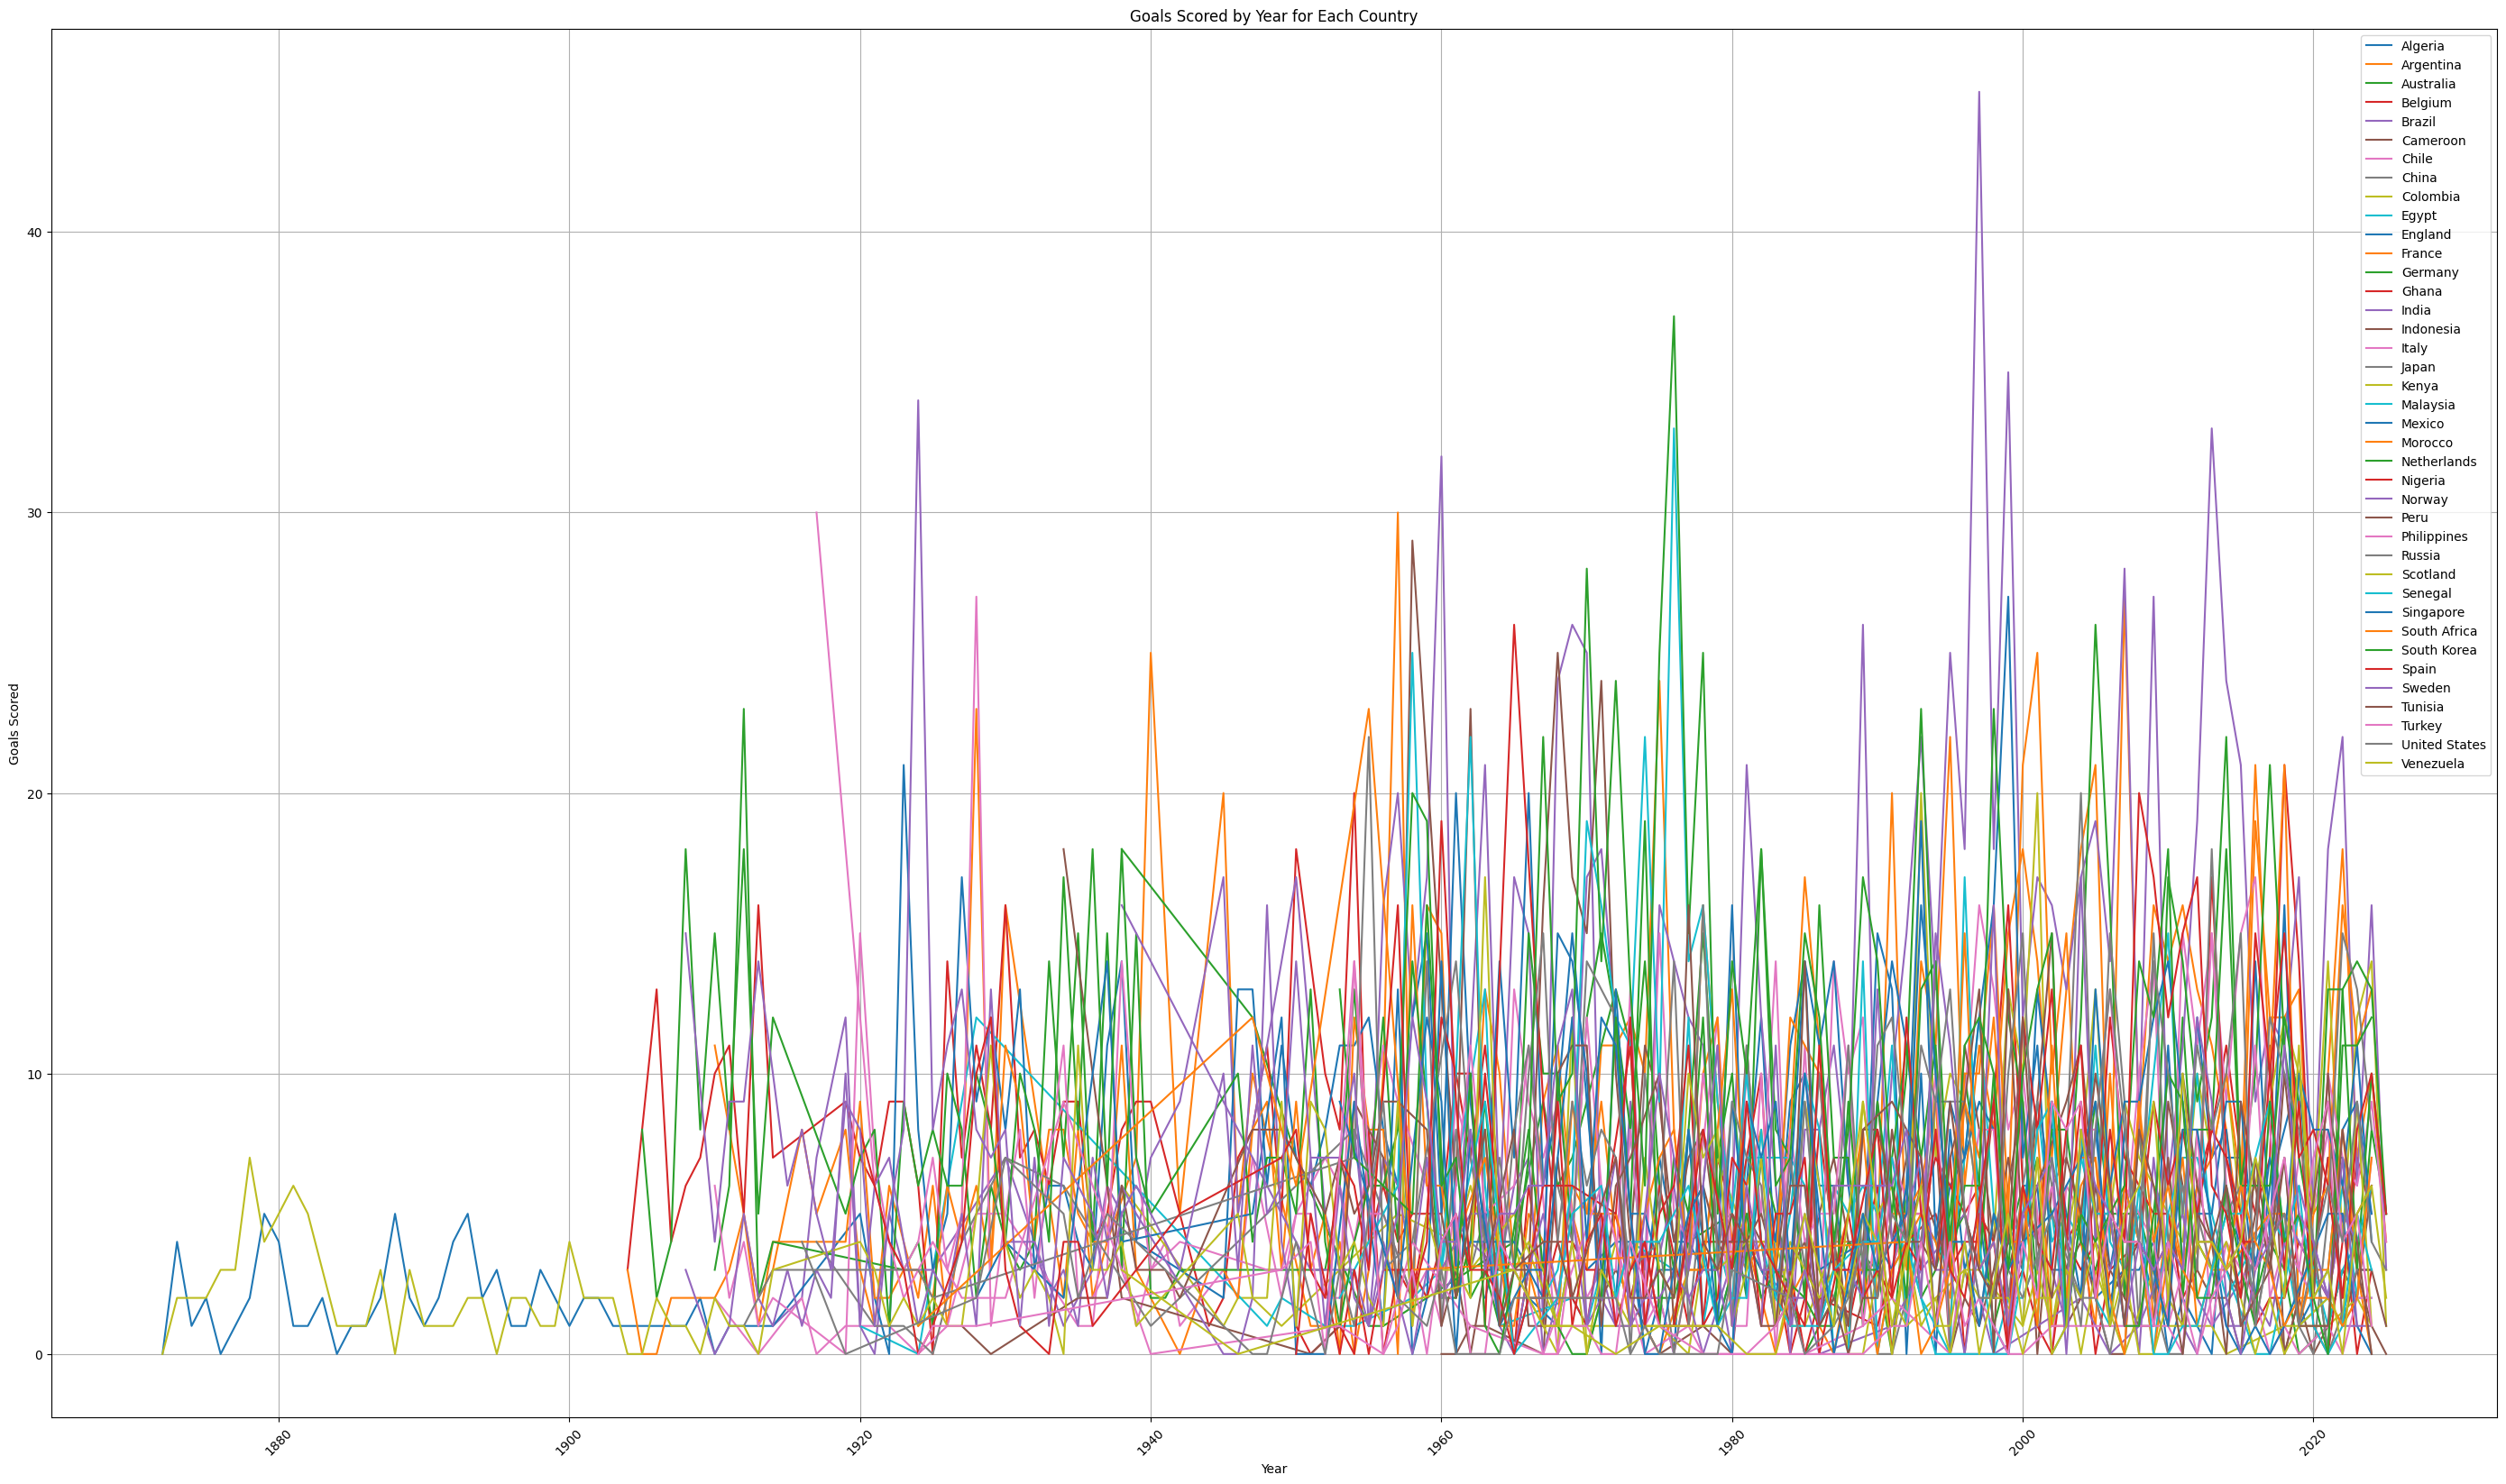

In [41]:
# Plot the goals scored by year for each country
plt.figure(figsize=(35, 20))
plt.title('Goals Scored by Year for Each Country')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.grid()
for country in selected_countries:
    plt.plot(goals_scored_by_year_df[country]['year'], goals_scored_by_year_df[country]['goals_scored'], label=country)
plt.legend()
plt.show()

In [47]:
# Sort them by regions [Africa, Asia, Europe, North America, South America, Oceania]
regions = {
    'Africa': ['Egypt', 'Tunisia', 'Morocco', 'Cameroon', 'Senegal', 'South Africa', 'Nigeria', 'Kenya', 'Ghana', 'Algeria'],
    'Asia': ['Japan', 'South Korea', 'China', 'India'],
    'Europe': ['England', 'Scotland', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 'Belgium'],
    'North America': ['United States','Mexico'],
    'South America': ['Brazil','Argentina','Colombia','Chile','Peru','Venezuela'],
    'Oceania': ['Australia']
}

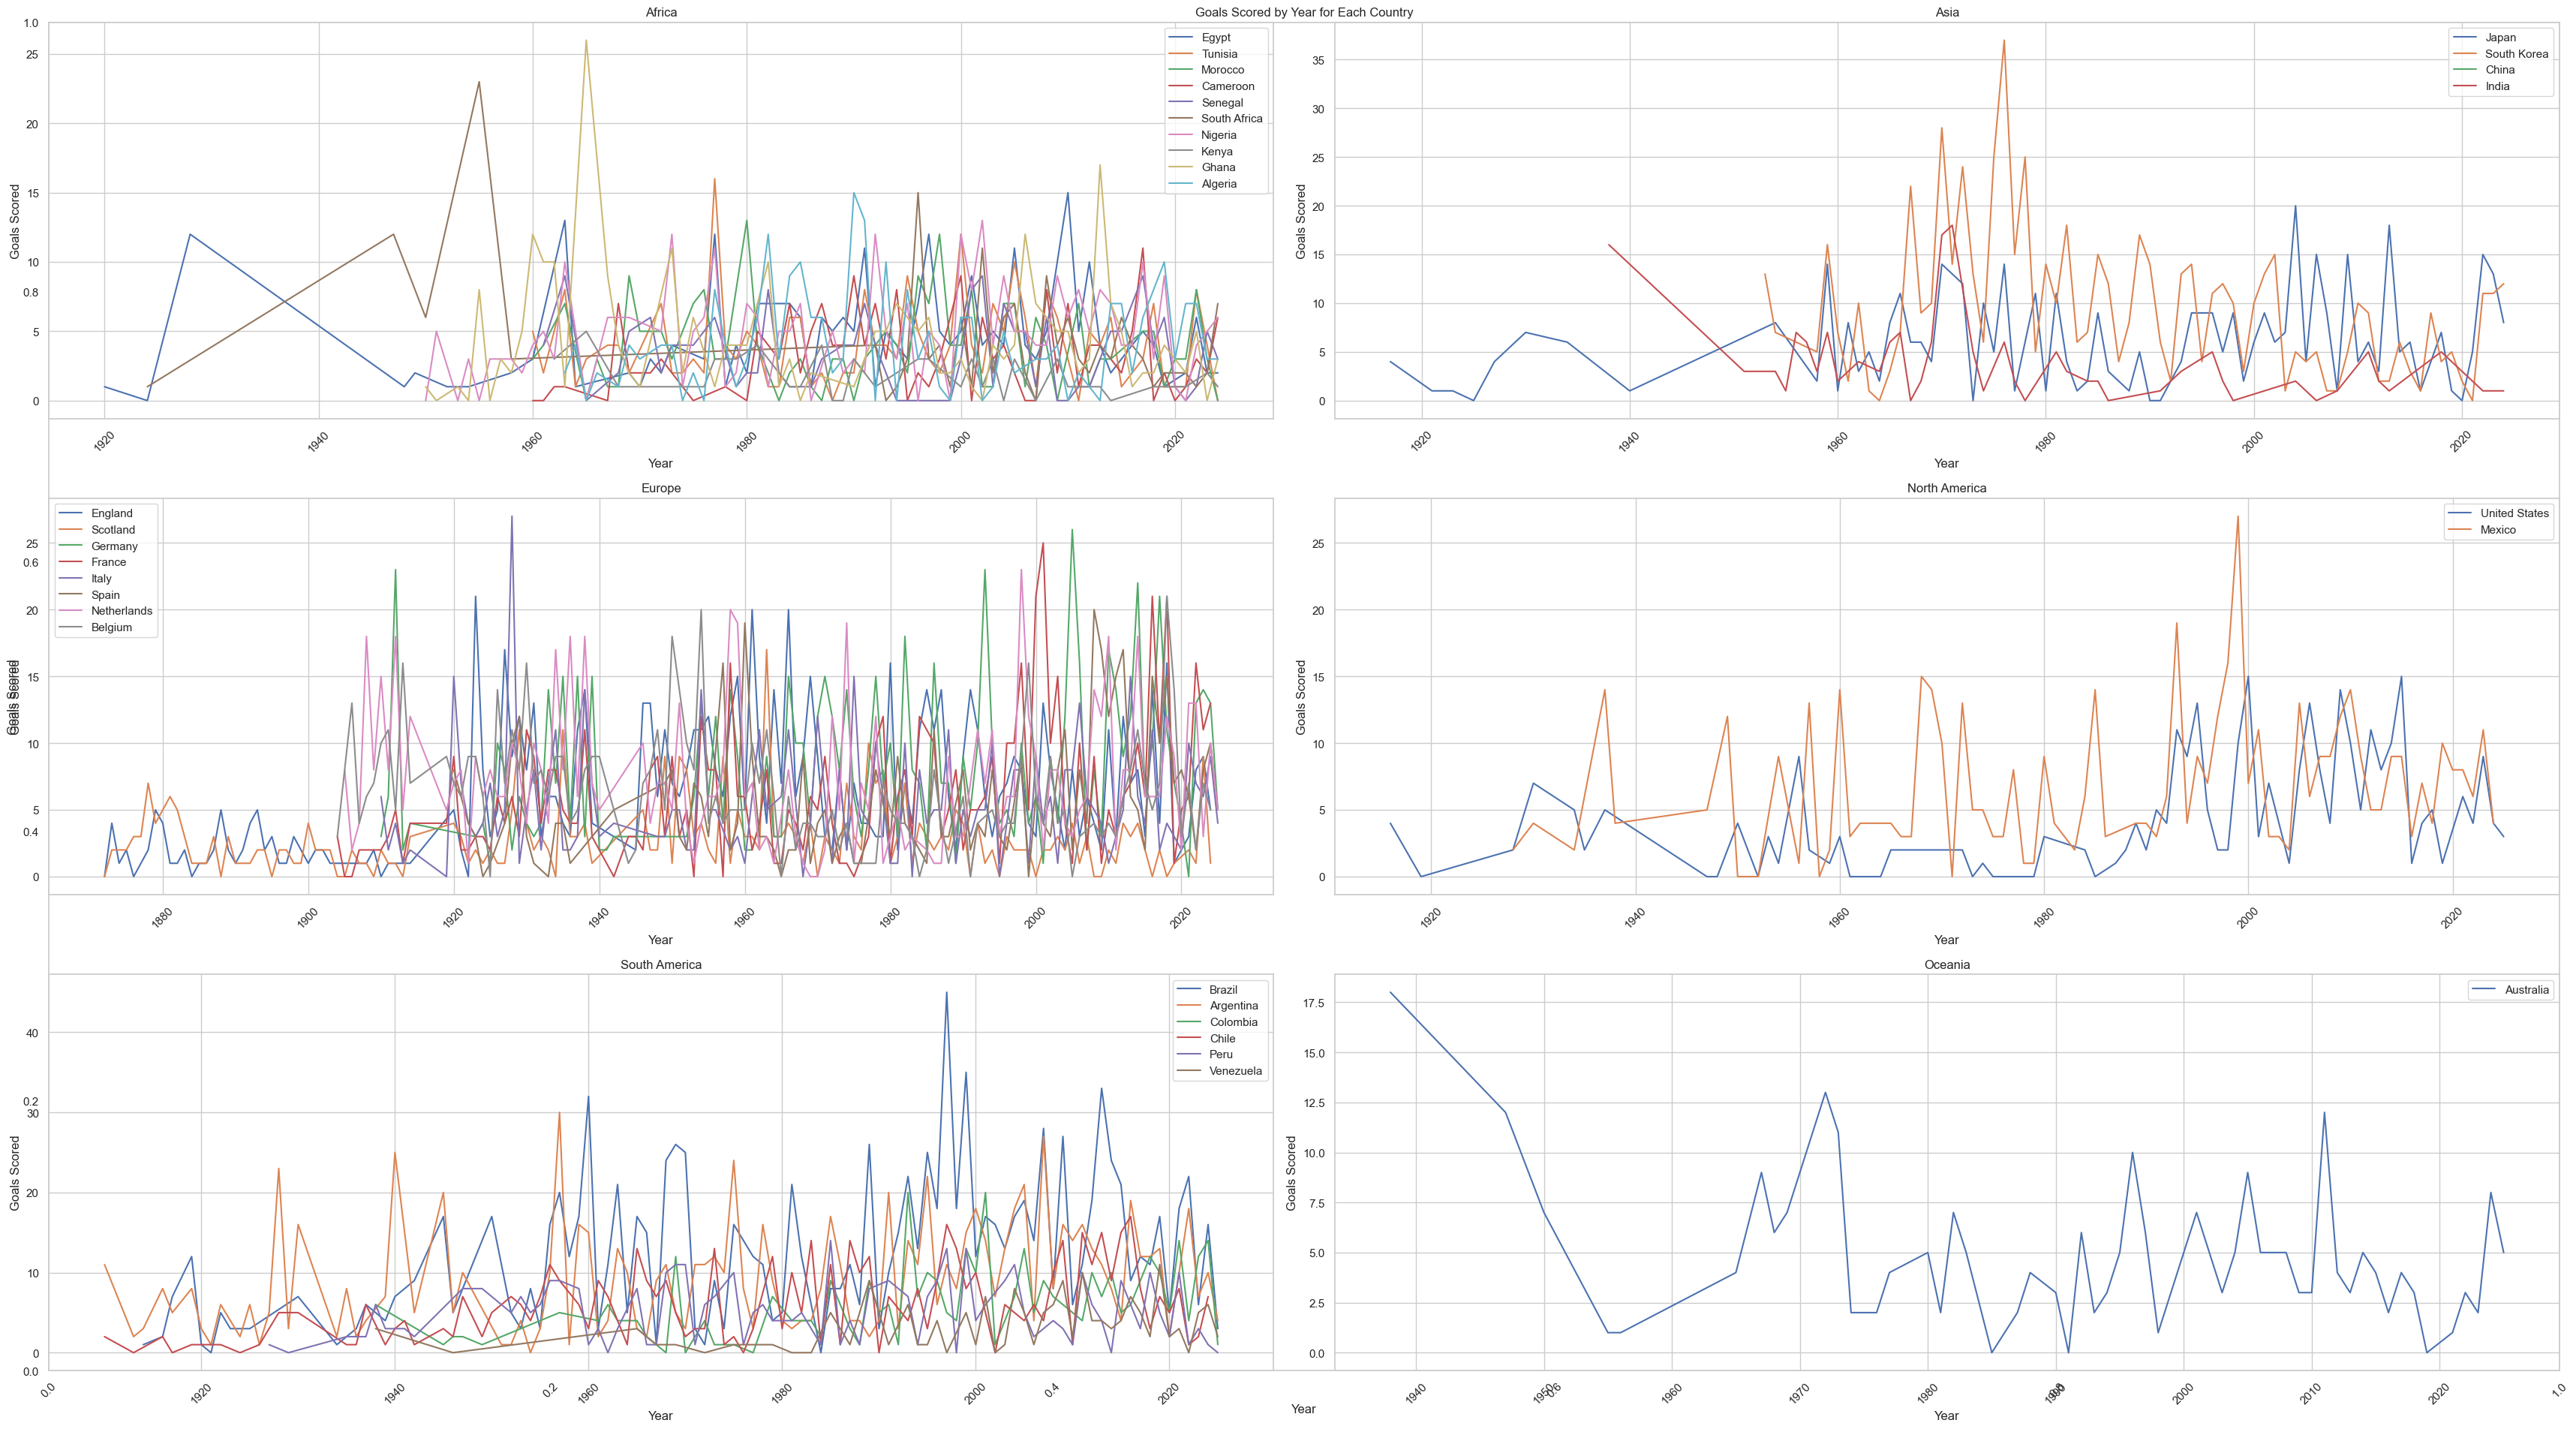

In [48]:
# We will plot the goals scored by year for each country in the regions by different sub plots for each region
plt.figure(figsize=(35, 20))
plt.title('Goals Scored by Year for Each Country')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.grid()
for region, countries in regions.items():
    plt.subplot(3, 2, list(regions.keys()).index(region)+1)
    plt.title(region)
    plt.xlabel('Year')
    plt.ylabel('Goals Scored')
    plt.xticks(rotation=45)
    for country in countries:
        plt.plot(goals_scored_by_year_df[country]['year'], goals_scored_by_year_df[country]['goals_scored'], label=country)
    plt.legend()
plt.tight_layout()
plt.show()